In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import helpers.processing_helpers as ph

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [19]:
df_dev = pd.read_csv("./dataset/development.csv")

In [20]:
noise_indexes = [0,7,12,15,16,17]
acc_idxs = [1,2,3,4,5,6,8,9,10,11,13,14]
features = ["pmax", "negpmax", 'area', 'tmax', 'rms']

sensors_removed = df_dev.drop(columns=ph.get_column_names(features, noise_indexes))
df = sensors_removed.drop(columns=ph.get_column_names(['tmax', 'rms'], acc_idxs))

# Starting with negpmax outliers

In [21]:
# Checking how many of the sensors have values above 0
negpmax_clms = df[[f'negpmax[{i}]' for i in acc_idxs]]
df_above_zero = negpmax_clms[(negpmax_clms > 0).any(axis=1)]
#sensors_removed = sensors_removed.drop(df_above_zero.index.values)
df_above_zero

,negpmax[1],negpmax[2],negpmax[3],negpmax[4],negpmax[5],negpmax[6],negpmax[8],negpmax[9],negpmax[10],negpmax[11],negpmax[13],negpmax[14]
93055,-5.230824,74820.439676,-6.426794,-7.850610,-72.066412,-19.270636,-12.398489,-4.941119,-7.263858,-4.484512,-7.634818,-6.796109
188194,-5.892503,74827.377234,-5.836270,-5.698038,-19.653781,-5.550021,-4.592166,-4.340689,-40.689526,-10.598145,-39.415897,-4.135703
232393,-18.781116,-19.235596,-17.818414,-19.567654,-17.616177,-19.700745,-16.931372,-22.695142,-32.393964,-36.985382,-28.748840,74812.277374


In [22]:
# we are just going to set this value to -5, which we will see is this some kind of that all sensor that are not close to the particle will hover around
# row 232393 has the problem that it both has a column above 70k and also all the other columns are below -10
df[negpmax_clms > 0] = -15

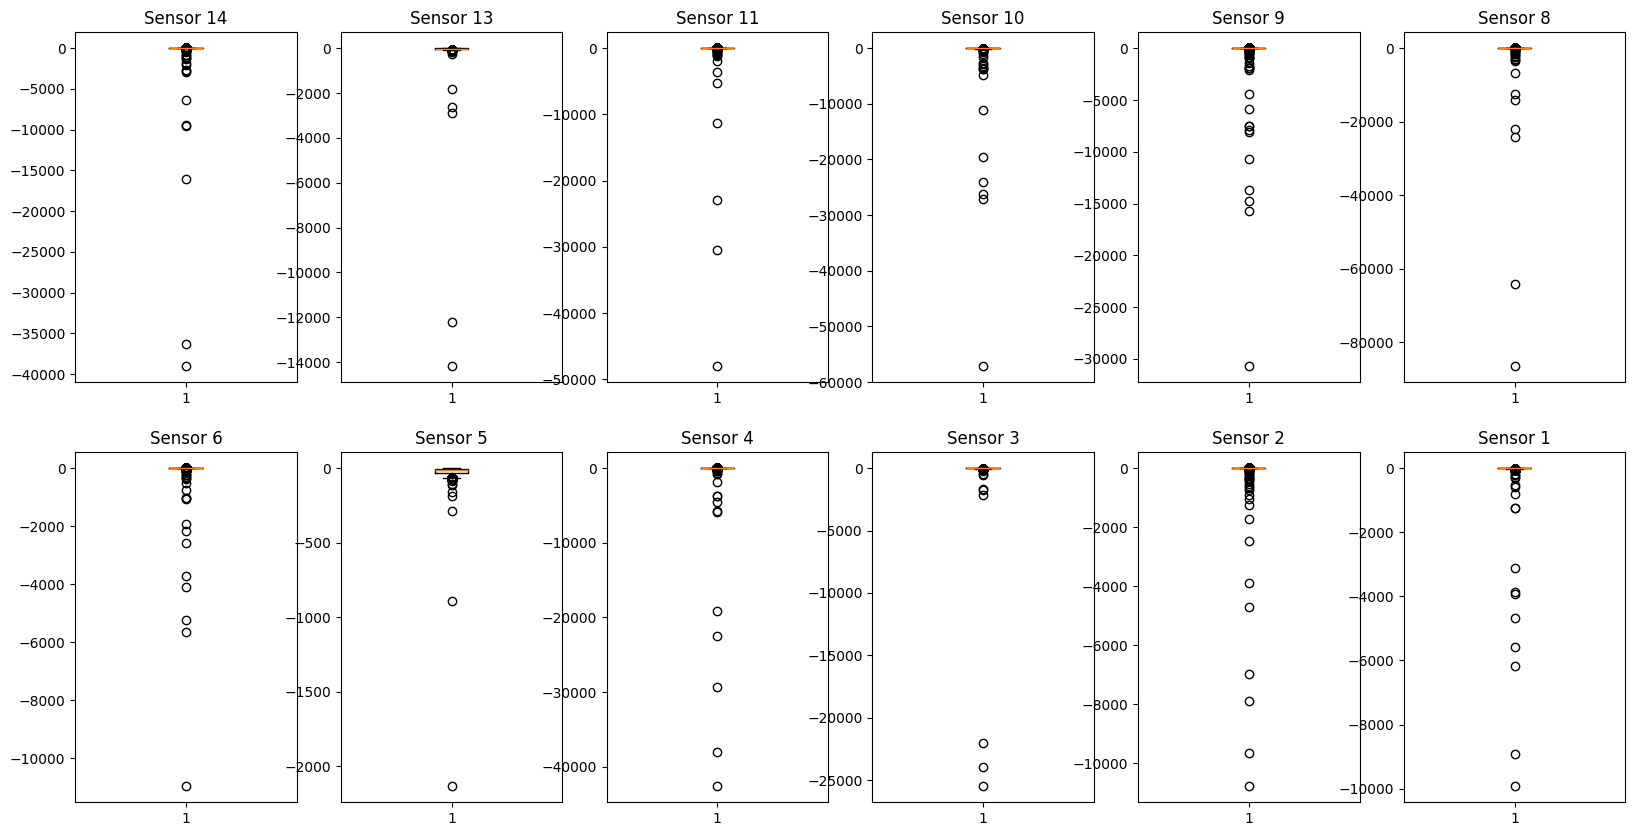

In [23]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(df[f'negpmax[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

Text(0.5, 0, 'Row number')

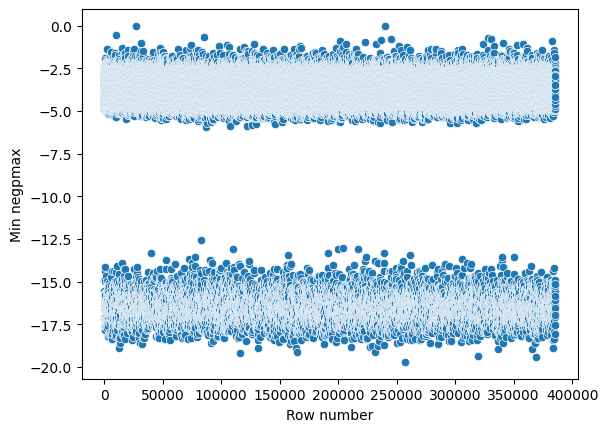

In [24]:
negpmax = df[ph.NEGPMAX_CLM_NAMES]
max_values = negpmax.max(axis=1)
plot = sb.scatterplot(x=max_values.index, y=max_values)
plot.set_ylabel('Min negpmax')
plot.set_xlabel('Row number')

In [25]:
# When we plot these, its quite clear that these are in the minority

max_below_minus_ten = max_values[max_values < -10]
max_below_minus_ten

0        -15.625539
122      -14.926660
146      -14.879971
202      -15.557925
220      -17.126544
            ...    
385423   -15.527471
385436   -15.277594
385460   -17.551843
385476   -15.811865
385499   -15.145020
Length: 8063, dtype: float64

In [26]:
df.loc[max_below_minus_ten.index.values][ph.PMAX_CLM_NAMES].min(axis=1).sort_values()

284806     1.854810
374439     2.255334
271561     2.294635
295215     2.295825
62358      2.296594
            ...    
204674    10.965448
199612    11.179517
221161    11.377481
213819    11.495273
98688     12.027478
Length: 8063, dtype: float64

In [27]:
df.loc[98688][ph.NEGPMAX_CLM_NAMES + ph.PMAX_XY_CLM_NAMES]

negpmax[1]     -19.196194
negpmax[2]     -21.494192
negpmax[3]     -18.307513
negpmax[4]     -18.297071
negpmax[5]     -57.250812
negpmax[6]     -17.441641
negpmax[8]     -19.155951
negpmax[9]     -17.301071
negpmax[10]    -19.587189
negpmax[11]    -18.042871
negpmax[13]    -21.148349
negpmax[14]    -16.940315
pmax[1]         16.415195
pmax[2]         12.027478
pmax[3]         20.199959
pmax[4]         24.999799
pmax[5]        112.848218
pmax[6]         30.924570
pmax[8]         29.205898
pmax[9]         18.111893
pmax[10]        17.956900
pmax[11]        15.799597
pmax[13]        15.804468
pmax[14]        12.927264
x              285.000000
y              500.000000
Name: 98688, dtype: float64

# pmax outliers

Now we do the same thing for the pmax values

In [28]:
pmax_clm_names = ph.get_column_names(['pmax'], acc_idxs)
pmax_clms = df[pmax_clm_names]
pmax_clms

,pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
0,5.409161,6.084506,3.811328,4.893027,9.322305,3.077338,26.581253,99.361264,42.068393,12.438458,7.454877,6.611877
1,4.414289,4.507257,3.940369,5.549379,9.373914,5.424356,27.797015,96.062561,38.690210,12.326212,18.472514,13.802252
2,4.567191,5.384155,4.903412,3.795407,7.499896,5.846233,23.163651,93.767398,40.337067,9.253250,7.336668,5.940039
3,5.019058,4.165598,3.791672,4.848719,10.422260,5.157927,26.592899,89.620438,37.796774,10.900876,8.450671,6.434910
4,3.250262,4.736023,5.123048,3.026709,12.557806,6.115046,25.261710,106.109430,42.202023,13.956659,8.721952,4.483080
...,...,...,...,...,...,...,...,...,...,...,...,...
385495,49.819376,55.651440,63.119604,11.942999,12.878128,4.604367,4.668842,3.324582,5.018600,5.526794,19.454065,5.842563
385496,51.016495,58.084024,59.971158,11.555255,9.729486,4.075574,14.101810,12.819989,12.100403,15.208563,17.604636,11.819031
385497,46.661682,61.840103,73.850089,16.884897,13.104062,6.381778,7.160672,3.859982,6.587385,5.343299,20.783524,10.120659
385498,46.515765,49.772070,59.277927,12.191660,11.139015,14.606870,16.477707,11.385178,13.214905,13.605057,14.048267,10.754880


In [29]:
pmax_xy_clm_names = pmax_clm_names + ['x', 'y']
pmax_xy_clms = df[pmax_xy_clm_names]

xy_pmax_average = pmax_xy_clms.groupby(by=['x', 'y']).mean().reset_index()
xy_pmax_average[(xy_pmax_average['x'] == 400) & (xy_pmax_average['y'] == 390)]

,x,y,pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
1942,400.0,390.0,12.305492,6.173773,19.913299,10.939037,52.511085,10.380457,15.342057,9.277131,52.996427,21.734304,74.866131,13.641195


<Axes: xlabel='None', ylabel='None'>

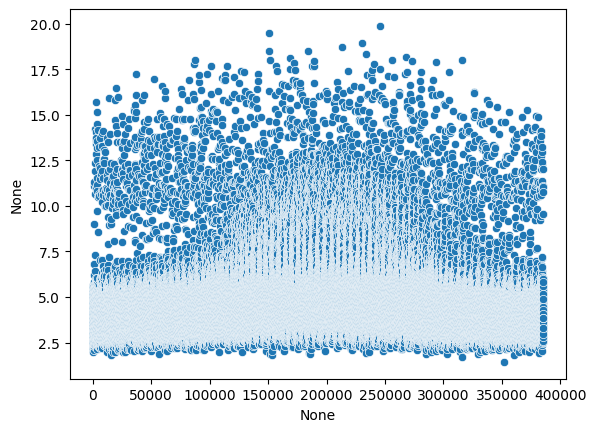

In [30]:
min_values = pmax_clms.min(axis=1)
sb.scatterplot(x=min_values.index, y=min_values)
# not quite as obvious of a pattern...

Maybe we can look at the sum of the errors between records and the mean average values for each respective xy-point

In [31]:
repeated = pd.DataFrame(np.repeat(xy_pmax_average.drop(columns=['x', 'y']).values, 100, axis=0))
repeated.columns = pmax_clm_names
repeated

,pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
0,4.673998,4.845091,4.815911,4.765275,9.295822,5.274141,25.497638,97.715352,40.392624,10.077815,8.085784,5.151071
1,4.673998,4.845091,4.815911,4.765275,9.295822,5.274141,25.497638,97.715352,40.392624,10.077815,8.085784,5.151071
2,4.673998,4.845091,4.815911,4.765275,9.295822,5.274141,25.497638,97.715352,40.392624,10.077815,8.085784,5.151071
3,4.673998,4.845091,4.815911,4.765275,9.295822,5.274141,25.497638,97.715352,40.392624,10.077815,8.085784,5.151071
4,4.673998,4.845091,4.815911,4.765275,9.295822,5.274141,25.497638,97.715352,40.392624,10.077815,8.085784,5.151071
...,...,...,...,...,...,...,...,...,...,...,...,...
385495,51.544349,58.428994,66.864854,13.336358,12.306240,5.521397,5.344906,5.212512,5.972605,5.594298,18.613362,8.955890
385496,51.544349,58.428994,66.864854,13.336358,12.306240,5.521397,5.344906,5.212512,5.972605,5.594298,18.613362,8.955890
385497,51.544349,58.428994,66.864854,13.336358,12.306240,5.521397,5.344906,5.212512,5.972605,5.594298,18.613362,8.955890
385498,51.544349,58.428994,66.864854,13.336358,12.306240,5.521397,5.344906,5.212512,5.972605,5.594298,18.613362,8.955890


In [32]:
diff = pmax_clms - repeated
diff

,pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
0,0.735164,1.239415,-1.004583,0.127753,0.026483,-2.196803,1.083615,1.645912,1.675769,2.360643,-0.630907,1.460806
1,-0.259709,-0.337834,-0.875542,0.784105,0.078092,0.150215,2.299377,-1.652791,-1.702414,2.248396,10.386731,8.651181
2,-0.106807,0.539064,0.087501,-0.969867,-1.795926,0.572092,-2.333988,-3.947954,-0.055557,-0.824565,-0.749116,0.788968
3,0.345061,-0.679493,-1.024239,0.083445,1.126438,-0.116213,1.095260,-8.094914,-2.595850,0.823061,0.364888,1.283838
4,-1.423735,-0.109068,0.307137,-1.738566,3.261984,0.840905,-0.235929,8.394078,1.809399,3.878844,0.636168,-0.667991
...,...,...,...,...,...,...,...,...,...,...,...,...
385495,-1.724974,-2.777554,-3.745249,-1.393359,0.571888,-0.917030,-0.676065,-1.887930,-0.954005,-0.067504,0.840703,-3.113327
385496,-0.527855,-0.344970,-6.893696,-1.781103,-2.576754,-1.445823,8.756903,7.607477,6.127797,9.614265,-1.008727,2.863141
385497,-4.882667,3.411109,6.985235,3.548539,0.797822,0.860381,1.815766,-1.352530,0.614780,-0.251000,2.170161,1.164769
385498,-5.028584,-8.656924,-7.586927,-1.144698,-1.167225,9.085472,11.132801,6.172666,7.242299,8.010758,-4.565096,1.798990


In [33]:
sqrd = diff**2
sqrd

,pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
0,0.540466,1.536150,1.009187,0.016321,0.000701,4.825944,1.174221,2.709028,2.808202,5.572636,0.398044,2.133955
1,0.067449,0.114132,0.766574,0.614820,0.006098,0.022565,5.287135,2.731717,2.898213,5.055287,107.884172,74.842932
2,0.011408,0.290590,0.007656,0.940643,3.225349,0.327289,5.447499,15.586337,0.003087,0.679907,0.561175,0.622471
3,0.119067,0.461711,1.049066,0.006963,1.268862,0.013506,1.199595,65.527632,6.738435,0.677429,0.133143,1.648241
4,2.027022,0.011896,0.094333,3.022610,10.640538,0.707121,0.055662,70.460551,3.273926,15.045429,0.404709,0.446212
...,...,...,...,...,...,...,...,...,...,...,...,...
385495,2.975534,7.714804,14.026891,1.941448,0.327056,0.840944,0.457064,3.564279,0.910125,0.004557,0.706781,9.692806
385496,0.278630,0.119004,47.523041,3.172326,6.639662,2.090405,76.683357,57.873709,37.549902,92.434087,1.017529,8.197575
385497,23.840439,11.635666,48.793507,12.592129,0.636519,0.740255,3.297005,1.829336,0.377955,0.063001,4.709601,1.356686
385498,25.286657,74.942328,57.561461,1.310334,1.362414,82.545808,123.939249,38.101803,52.450901,64.172248,20.840097,3.236364


In [34]:
sum_of_squares = sqrd.sum(axis=1)
sum_of_squares[sum_of_squares > 500]

102        884.694076
462        561.370313
634       1192.462403
651       1054.453651
979        567.386539
             ...     
384863     651.126935
384902     659.393635
385082    2885.901094
385461     530.194418
385498     545.749663
Length: 3129, dtype: float64

In [35]:
display(df.loc[385082][pmax_clm_names+['x', 'y']])
display(xy_pmax_average[(xy_pmax_average['x']==600) & (xy_pmax_average['y']==575)])

pmax[1]      23.334253
pmax[2]      14.743649
pmax[3]      53.932281
pmax[4]       7.570258
pmax[5]      10.128049
pmax[6]       6.113630
pmax[8]       5.605933
pmax[9]       6.520979
pmax[10]      5.998462
pmax[11]      7.309558
pmax[13]     19.451074
pmax[14]     10.655231
x           600.000000
y           575.000000
Name: 385082, dtype: float64

,x,y,pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
3850,600.0,575.0,61.077165,50.300009,66.164552,12.790822,13.034845,5.420599,4.934395,4.747463,6.204322,5.718607,21.717369,10.678588


(0.0, 400000.0)

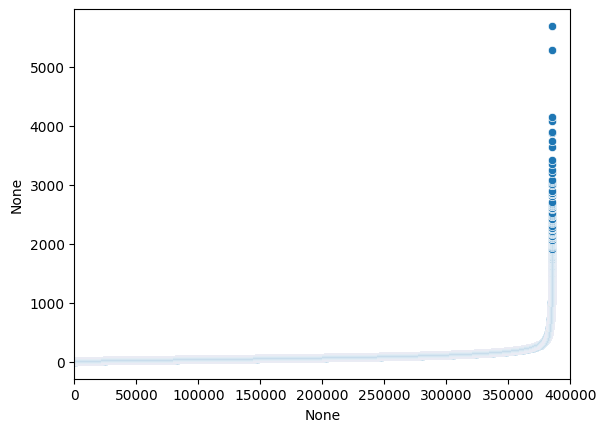

In [36]:
plot = sb.scatterplot(x=pd.Series(np.sort(sum_of_squares)).index, y=pd.Series(np.sort(sum_of_squares)))
plot.set_xlim(0, 400000)

(360000.0, 400000.0)

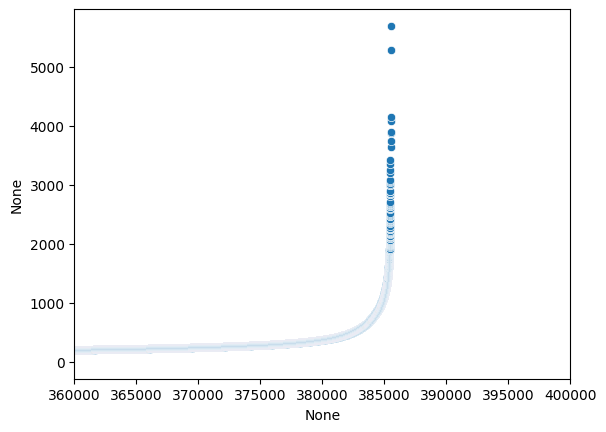

In [39]:
plot = sb.scatterplot(x=pd.Series(np.sort(sum_of_squares)).index, y=pd.Series(np.sort(sum_of_squares)))
plot.set_xlim(360000, 400000)

There definitely seems to be some outlier records for the pmax values as well, but they seem to be bit harder to find.

# Correlations

(-100.0, 0.0)

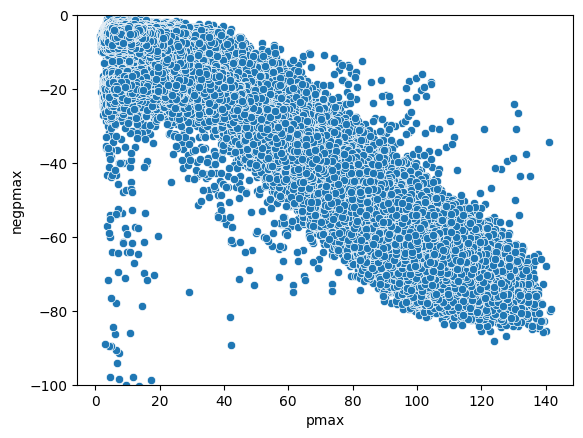

In [38]:
joined_negpmax = pd.concat([df[clmn] for clmn in negpmax])
joined_pmax = pd.concat([df[clmn] for clmn in pmax_clms])
scatter = sb.scatterplot(x=joined_pmax, y=joined_negpmax)
scatter.set_ylabel('negpmax')
scatter.set_xlabel('pmax')
scatter.set_ylim(-100, 0)